In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

import plotly.express as px
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px

from mpl_toolkits import mplot3d
plt.style.use('seaborn-poster')

In [6]:
#import data files

Processed = pd.read_csv('indexProcessed.csv')
Info = pd.read_csv('indexInfo.csv')

In [7]:
#reading data 
Processed.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,31/12/1986,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0,333.879006
1,HSI,02/01/1987,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0,330.213013
2,HSI,05/01/1987,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0,331.811987
3,HSI,06/01/1987,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0,335.906987
4,HSI,07/01/1987,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0,338.923013


In [8]:
Info


,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD
3,China,Shanghai Stock Exchange,000001.SS,CNY
4,Japan,Tokyo Stock Exchange,N225,JPY
5,Europe,Euronext,N100,EUR
6,China,Shenzhen Stock Exchange,399001.SZ,CNY
7,Canada,Toronto Stock Exchange,GSPTSE,CAD
8,India,National Stock Exchange of India,NSEI,INR
9,Germany,Frankfurt Stock Exchange,GDAXI,EUR


In [9]:
Processed.shape

(104224, 9)

In [10]:
# let us merge info and processed datat frames to make sure all the required data is in one place
processed_info = pd.merge(Processed,Info , on= "Index")

In [11]:
processed_info.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Region,Exchange,Currency
0,HSI,31/12/1986,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0,333.879006,Hong Kong,Hong Kong Stock Exchange,HKD
1,HSI,02/01/1987,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0,330.213013,Hong Kong,Hong Kong Stock Exchange,HKD
2,HSI,05/01/1987,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0,331.811987,Hong Kong,Hong Kong Stock Exchange,HKD
3,HSI,06/01/1987,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0,335.906987,Hong Kong,Hong Kong Stock Exchange,HKD
4,HSI,07/01/1987,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0,338.923013,Hong Kong,Hong Kong Stock Exchange,HKD


In [12]:
processed_info.shape

(104224, 12)

In [13]:
#cross verifing the data that is merged

print(processed_info.columns)
print("--------------------------------------------")
print(processed_info.head())
print("--------------------------------------------")
print(processed_info.info())
print("--------------------------------------------")

Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'CloseUSD', 'Region', 'Exchange', 'Currency'],
      dtype='object')
--------------------------------------------
  Index        Date         Open         High          Low        Close  \
0   HSI  31/12/1986  2568.300049  2568.300049  2568.300049  2568.300049   
1   HSI  02/01/1987  2540.100098  2540.100098  2540.100098  2540.100098   
2   HSI  05/01/1987  2552.399902  2552.399902  2552.399902  2552.399902   
3   HSI  06/01/1987  2583.899902  2583.899902  2583.899902  2583.899902   
4   HSI  07/01/1987  2607.100098  2607.100098  2607.100098  2607.100098   

     Adj Close  Volume    CloseUSD     Region                  Exchange  \
0  2568.300049       0  333.879006  Hong Kong  Hong Kong Stock Exchange   
1  2540.100098       0  330.213013  Hong Kong  Hong Kong Stock Exchange   
2  2552.399902       0  331.811987  Hong Kong  Hong Kong Stock Exchange   
3  2583.899902       0  335.906987  Hong Kong  Ho

In [14]:
#verfing if there are any null or nan values which needs to taken care of 

processed_info.isnull().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
CloseUSD     0
Region       0
Exchange     0
Currency     0
dtype: int64

In [15]:
# stats of the merged dataset

processed_info.describe()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,104224.000000,104224.000000,104224.000000,104224.000000,104224.000000,1.042240e+05,104224.000000
mean,8015.353334,8063.324234,7962.581120,8014.366642,8014.161269,1.347646e+09,3046.729177
std,9140.563404,9196.575802,9082.767802,9140.609758,9140.720456,4.427662e+09,3747.865623
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00,10.204900
25%,2046.887756,2057.213990,2037.185943,2047.506470,2047.358490,0.000000e+00,320.460898
50%,5772.140137,5812.764892,5725.199951,5773.710205,5773.710205,9.529000e+05,1371.598487
75%,10487.377445,10552.179690,10416.092287,10488.622560,10488.622560,2.064676e+08,4383.045241
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10,18934.376170


In [16]:
# getting the list of colums in the dataset
processed_info.columns

Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'CloseUSD', 'Region', 'Exchange', 'Currency'],
      dtype='object')

In [17]:
#finding the pair vise corelation in the dataset
processed_info.corr()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Open,1.000000,0.999958,0.999942,0.999904,0.999904,0.129090,0.187904
High,0.999958,1.000000,0.999929,0.999954,0.999954,0.128926,0.187606
Low,0.999942,0.999929,1.000000,0.999958,0.999958,0.128964,0.188190
Close,0.999904,0.999954,0.999958,1.000000,1.000000,0.128971,0.187979
Adj Close,0.999904,0.999954,0.999958,1.000000,1.000000,0.128976,0.187980
Volume,0.129090,0.128926,0.128964,0.128971,0.128976,1.000000,0.506375
CloseUSD,0.187904,0.187606,0.188190,0.187979,0.187980,0.506375,1.000000


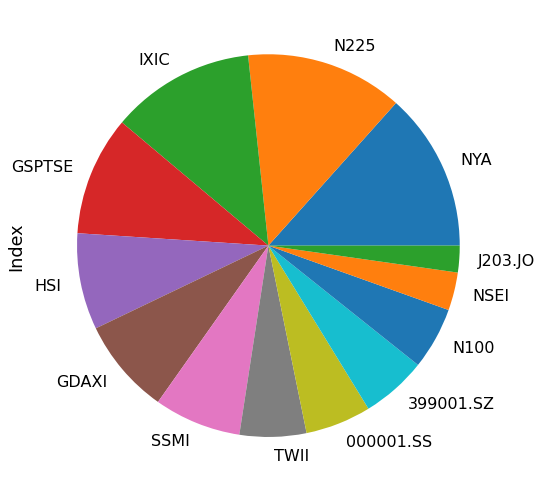

In [18]:
processed_info.Index.value_counts(normalize = True).plot.pie()
plt.show()

In [16]:
"""from the above pie plot we can see that N225 , IXIX and NYC take up the largest 
   proportion of the total stock exchange in the world

 for this analysis let is consider all the stocks from NYA (New York Stock Exchange)
 in this analysis I would like to predict close and high value of stock taking open value as the independent varaible 
 
""" 

'from the above pie plot we can see that N225 , IXIX and NYC take up the largest \n   proportion of the total stock exchange in the world\n\n for this analysis let is consider all the stocks from NYA (New York Stock Exchange)\n in this analysis I would like to predict close and high value of stock taking open value as the independent varaible \n \n'

In [19]:
nyc_df = processed_info[processed_info.Index == 'NYA']

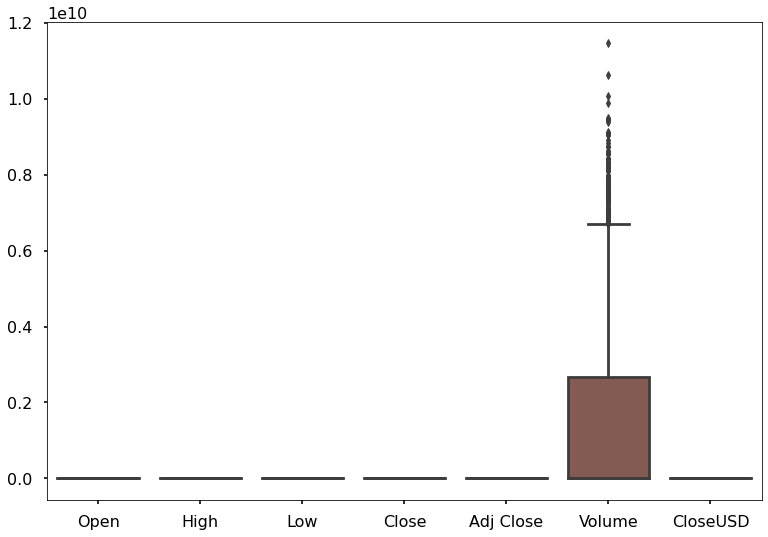

In [20]:
sns.boxplot(data = nyc_df )
plt.xticks()
plt.show()

In [21]:
nyc_df['Volume']

8492              0
8493              0
8494              0
8495              0
8496              0
            ...    
22434    2947400000
22435    3420870000
22436    3674490000
22437    5201110000
22438    4199270000
Name: Volume, Length: 13947, dtype: int64

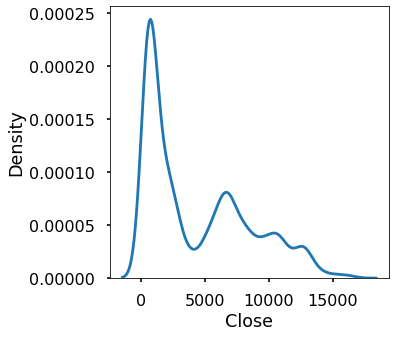

In [22]:
fig , ax = plt.subplots(figsize=(5,5))
ax = sns.kdeplot(nyc_df['Close'] )

In [23]:
nyc_df['Date'] = pd.to_datetime(nyc_df['Date'])
nyc_df['year'] = nyc_df['Date'].dt.year

C:\Users\bhava\AppData\Local\Temp\ipykernel_27148\75901711.py:1: UserWarning: Parsing '31/12/1965' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  nyc_df['Date'] = pd.to_datetime(nyc_df['Date'])
C:\Users\bhava\AppData\Local\Temp\ipykernel_27148\75901711.py:1: UserWarning: Parsing '13/01/1966' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  nyc_df['Date'] = pd.to_datetime(nyc_df['Date'])
C:\Users\bhava\AppData\Local\Temp\ipykernel_27148\75901711.py:1: UserWarning: Parsing '14/01/1966' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  nyc_df['Date'] = pd.to_datetime(nyc_df['Date'])
C:\Users\bhava\AppData\Local\Temp\ipykernel_27148\75901711.py:1: UserWarning: Parsing '17/01/1966' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  nyc_df['Date'] = pd.to_datetime(nyc_df['Date'])
C:\Users

In [24]:
nyc_df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Region,Exchange,Currency,year
8492,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0,528.690002,United States,New York Stock Exchange,USD,1965
8493,NYA,1966-03-01,527.210022,527.210022,527.210022,527.210022,527.210022,0,527.210022,United States,New York Stock Exchange,USD,1966
8494,NYA,1966-04-01,527.840027,527.840027,527.840027,527.840027,527.840027,0,527.840027,United States,New York Stock Exchange,USD,1966
8495,NYA,1966-05-01,531.119995,531.119995,531.119995,531.119995,531.119995,0,531.119995,United States,New York Stock Exchange,USD,1966
8496,NYA,1966-06-01,532.070007,532.070007,532.070007,532.070007,532.070007,0,532.070007,United States,New York Stock Exchange,USD,1966


In [25]:
nyc_df.shape

(13947, 13)

In [26]:
nyc_df.describe()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD,year
count,13947.000000,13947.000000,13947.000000,13947.000000,13947.000000,1.394700e+04,13947.000000,13947.000000
mean,4451.778151,4468.236552,4433.695014,4452.174711,4452.174711,1.215565e+09,4452.174711,1993.235821
std,4074.953735,4095.166918,4052.801658,4075.459366,4075.459366,1.834155e+09,4075.459366,15.966850
min,347.769989,347.769989,347.769989,347.769989,347.769989,0.000000e+00,347.769989,1965.000000
25%,654.940002,654.940002,654.940002,654.940002,654.940002,0.000000e+00,654.940002,1979.000000
50%,2631.800049,2631.800049,2631.800049,2631.800049,2631.800049,0.000000e+00,2631.800049,1993.000000
75%,7339.489990,7375.719971,7276.889893,7337.935059,7337.935059,2.681975e+09,7337.935059,2007.000000
max,16590.429690,16685.890630,16531.949220,16590.429690,16590.429690,1.145623e+10,16590.429690,2021.000000


In [41]:
#convert data types in to optimal
#import datetime as dt
#nyc_df = nyc_df.convert_dtypes()
#nyc_df["Date"] = pd.to_datetime(nyc_df["Date"])
#nyc_df["Date"] = nyc_df["Date"].map(dt.datetime.toordinal)
#nyc_df["Date"]

In [ ]:
# since we are deling with NYC the close vaues and 
#the closeUSD has the smilar data , dropping the closeUSD cloumns

In [27]:
nyc_df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Region,Exchange,Currency,year
8492,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0,528.690002,United States,New York Stock Exchange,USD,1965
8493,NYA,1966-03-01,527.210022,527.210022,527.210022,527.210022,527.210022,0,527.210022,United States,New York Stock Exchange,USD,1966
8494,NYA,1966-04-01,527.840027,527.840027,527.840027,527.840027,527.840027,0,527.840027,United States,New York Stock Exchange,USD,1966
8495,NYA,1966-05-01,531.119995,531.119995,531.119995,531.119995,531.119995,0,531.119995,United States,New York Stock Exchange,USD,1966
8496,NYA,1966-06-01,532.070007,532.070007,532.070007,532.070007,532.070007,0,532.070007,United States,New York Stock Exchange,USD,1966


In [ ]:
# multi linear regression

before stating the ML modle lets pair plot all the data that we will be using as independent and dependent varaibles in out model
independet : open , high , low
dependent : close

In [ ]:
'''' as per multi linear regression , i would llike to consider open , high and low as
independent varaibles and closing point as dependent varaible ''' 

In [28]:
x = nyc_df[["Open","High","Low" ]].values
y = nyc_df[["Close"]].values


train_test_split() method is used to create train and test sets, the feature variables are passed in the method. test size is given as 0.3, which means 30% of the data goes into test sets, and train set data contains 80% data. the random state is given make sure that data is not shuffiling over different runs

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression 
ml = LinearRegression()
reg = ml.fit(x_train,y_train)
reg.score(x_train,y_train)

0.9999732315420183

In [31]:
reg.coef_

array([[-0.64125663,  0.88073471,  0.76039715]])

In [32]:
reg.intercept_

array([0.27504782])

In [35]:
y_pred = ml.predict(x_test)

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.999973406245638

In [38]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

433.4150809077893

In [39]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
mean_squared_error(y_test,y_pred, squared=False)

20.81862341529308

In [131]:
mean_absolute_error(y_test,y_pred)

8.122908189732575

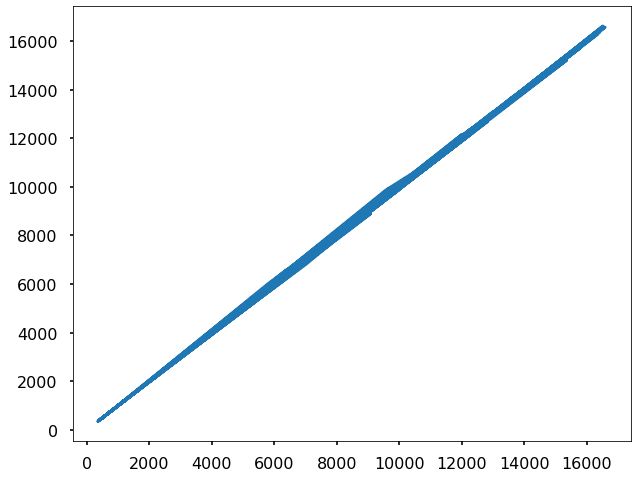

In [59]:
y = y_test
y1 = y_pred
plt.plot(y,y1)
plt.show()

open Vs close (open - x test Vs y_test) and open (x test Vs y_pred )

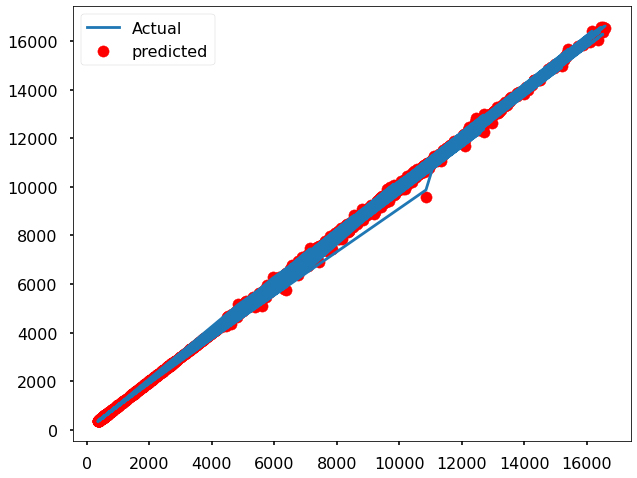

In [189]:
y = y_test
y1 = y_pred
x = x_test[:,0]
# open vs close
plt.plot(x,y1)
plt.scatter(x,y,color = "red",marker="o")
plt.rcParams["figure.figsize"] = (10,8)
plt.gca().legend(('Actual','predicted'))
plt.show()

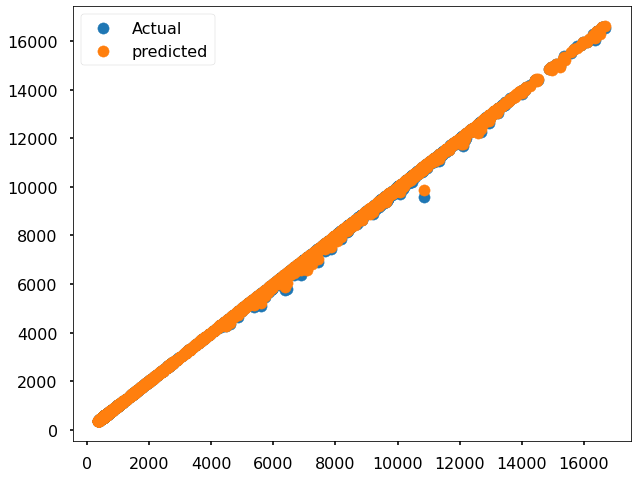

In [190]:
# high Vs close
x1 = x_test[:,1]
plt.scatter(x1,y)
plt.scatter(x1,y1)
plt.rcParams["figure.figsize"] = (10,8)
plt.gca().legend(('Actual','predicted'))
plt.show()

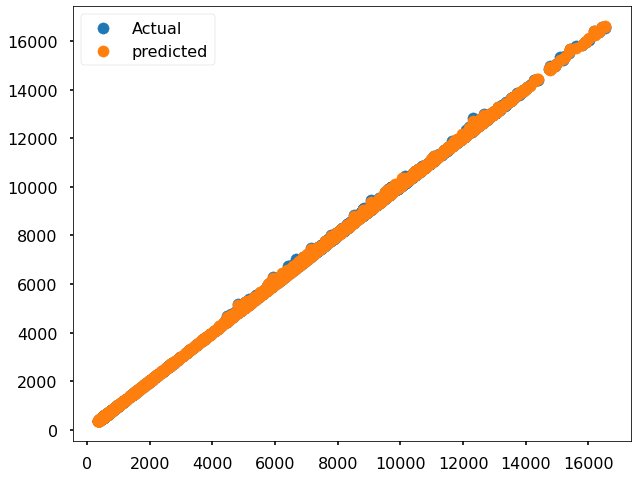

In [191]:
# low Vs close
x1 = x_test[:,2]
plt.scatter(x1,y)
plt.scatter(x1,y1)
plt.rcParams["figure.figsize"] = (10,8)
plt.gca().legend(('Actual','predicted'))
plt.show()

In [36]:
nyc_df['Date'] = pd.to_datetime(nyc_df['Date'])
nyc_df['year'] = nyc_df['Date'].dt.year
nyc_df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Region,Exchange,Currency,year
8492,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0,528.690002,United States,New York Stock Exchange,USD,1965
8493,NYA,1966-03-01,527.210022,527.210022,527.210022,527.210022,527.210022,0,527.210022,United States,New York Stock Exchange,USD,1966
8494,NYA,1966-04-01,527.840027,527.840027,527.840027,527.840027,527.840027,0,527.840027,United States,New York Stock Exchange,USD,1966
8495,NYA,1966-05-01,531.119995,531.119995,531.119995,531.119995,531.119995,0,531.119995,United States,New York Stock Exchange,USD,1966
8496,NYA,1966-06-01,532.070007,532.070007,532.070007,532.070007,532.070007,0,532.070007,United States,New York Stock Exchange,USD,1966


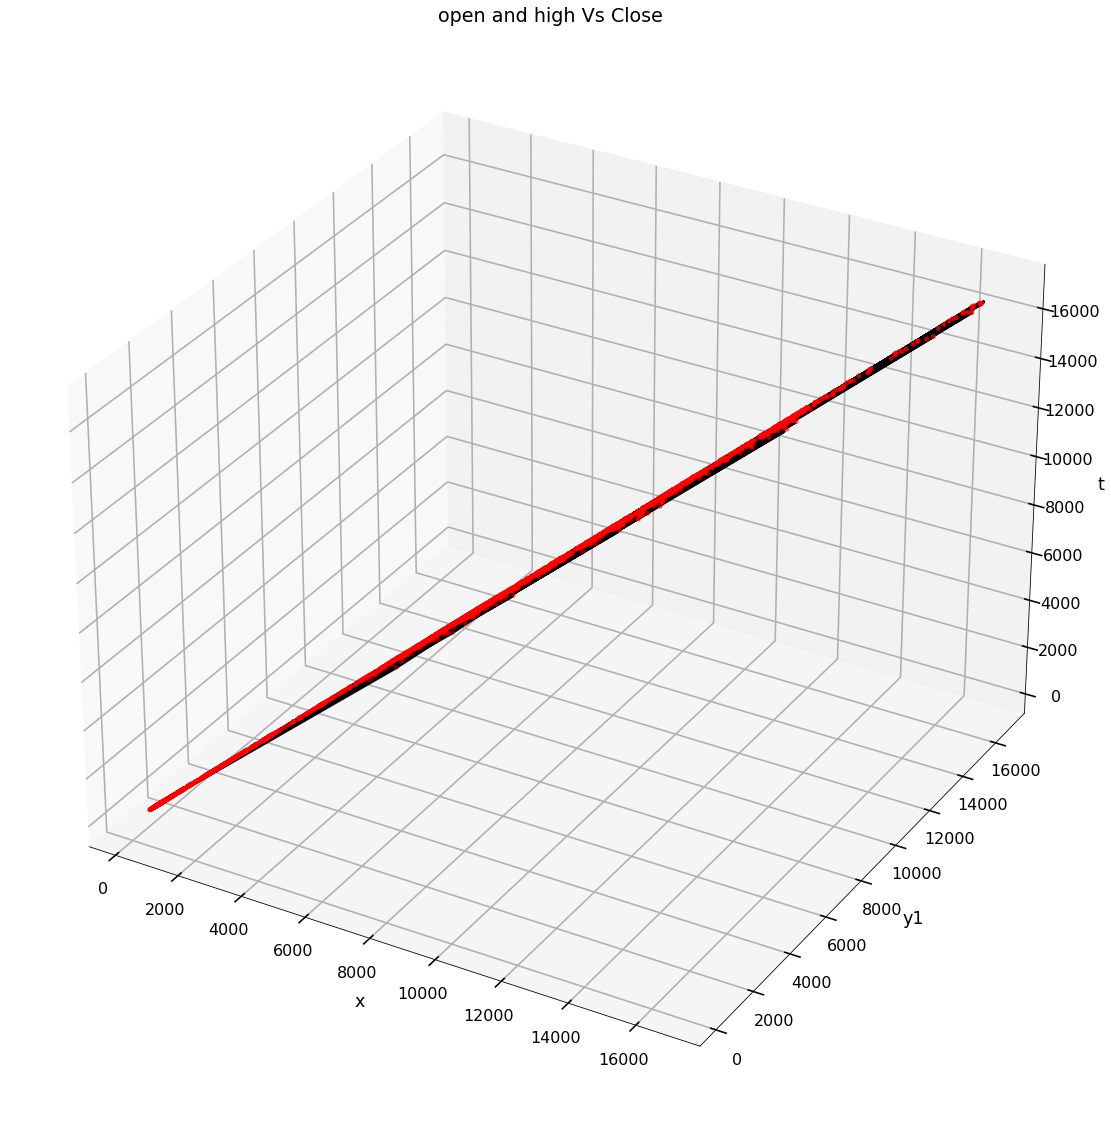

In [48]:
fig = plt.figure(figsize = (20,20))
ax = plt.axes(projection='3d')
ax.grid()

t = x_test[:,1] #open
x = x_test[:,2] #high
y = y_pred
y1 = y_test

ax.plot3D(x, y, t , color = "black")
ax.scatter3D(x, y1, t , color= "red")

ax.set_title('open and high Vs Close')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_ylabel('y1', labelpad=20)
ax.set_zlabel('t', labelpad=20)

plt.show()

In [4]:
import seaborn as sns

#sns.distplot(y_test-y_pred)
sns.distplot(y_pred)

NameError: name 'y_pred' is not defined

Lasso ML modle with and without hyper parameters  
https://machinelearningmastery.com/lasso-regression-with-python/

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

In [39]:
x = nyc_df[["Open","High","Low","year" ]].values
y = nyc_df[["Close"]].values

In [40]:
reg_mod = Lasso() # by default lambda - 1.0
reg_mod.fit(x_train,y_train)
Lasso_ypred = reg_mod.predict(x_test)
print(Lasso_ypred)

[ 6756.39528766 11147.82423676   562.11987036 ...  7764.43119356
  1988.29968035  6675.05779438]


In [133]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(r2_score(y_test,Lasso_ypred))
print(mean_squared_error(y_test,Lasso_ypred,squared=False))
print(mean_absolute_error(y_test,Lasso_ypred))

0.9998024417498946
56.74267009911263
21.422705361396186


In [203]:
reg_mod.coef_

array([1.00002388e+00, 1.51823810e-04, 4.15776736e-05])

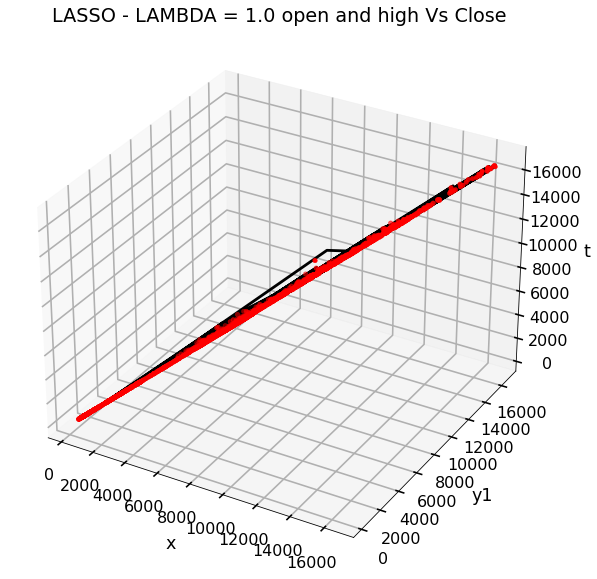

In [92]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

t = x_test[:,1] #open
x = x_test[:,2] #high
y = Lasso_ypred
y1 = y_test

ax.plot3D(x, y, t , color = "black")
ax.scatter3D(x, y1, t , color= "red")

ax.set_title('LASSO - LAMBDA = 1.0 open and high Vs Close')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_ylabel('y1', labelpad=20)
ax.set_zlabel('t', labelpad=20)

plt.show()

Tuning Lasso with hyper parameters

In [153]:

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[0.005, 0.05,0.5,5]}

lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=6)
lasso_regressor.fit(x_train,y_train)
l_pred=lasso_regressor.predict(x_test)


In [154]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)


{'alpha': 5}
-2768.5933828740854


In [156]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(r2_score(y_test,l_pred))
print(mean_squared_error(y_test,l_pred,squared=False))
print(mean_absolute_error(y_test,l_pred))

0.9998024419356845
56.74264341783543
21.423091265921947


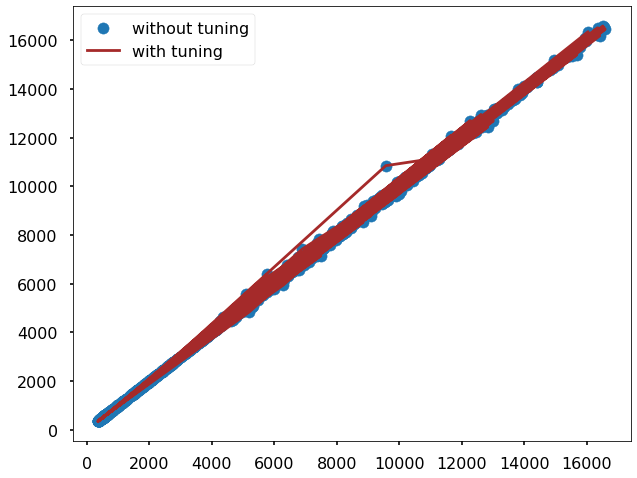

In [174]:
x = y_test
y = l_pred
y1 = Lasso_ypred
plt.scatter(x,y1)
plt.plot(x,y , color = "brown")
plt.gca().legend(('without tuning','with tuning'))
plt.show()

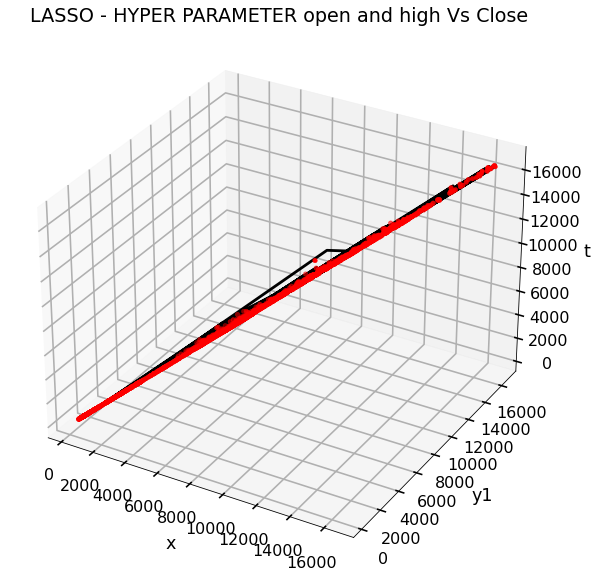

In [94]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

t = x_test[:,1] #open
x = x_test[:,2] #high
y = l_pred
y1 = y_test

ax.plot3D(x, y, t , color = "black")
ax.scatter3D(x, y1, t , color= "red")

ax.set_title('LASSO - HYPER PARAMETER open and high Vs Close')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_ylabel('y1', labelpad=20)
ax.set_zlabel('t', labelpad=20)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

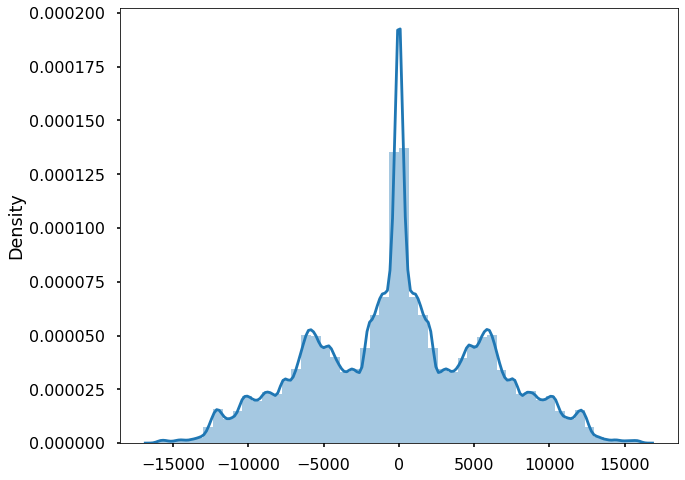

In [179]:
import seaborn as sns

sns.distplot(y_test-l_pred)


In [157]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[0.005, 0.05,0.5,5]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=6)
ridge_regressor.fit(x_train,y_train)



GridSearchCV(cv=6, estimator=Ridge(),
             param_grid={'alpha': [0.005, 0.05, 0.5, 5]},
             scoring='neg_mean_squared_error')

In [158]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.005}
-452.5974650879021


In [159]:
r_pred=ridge_regressor.predict(x_test)

In [161]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(r2_score(y_test,r_pred))
print(mean_squared_error(y_test,r_pred,squared=False))
print(mean_absolute_error(y_test,r_pred))

0.9999734062456331
20.818623417224565
8.122908190755936


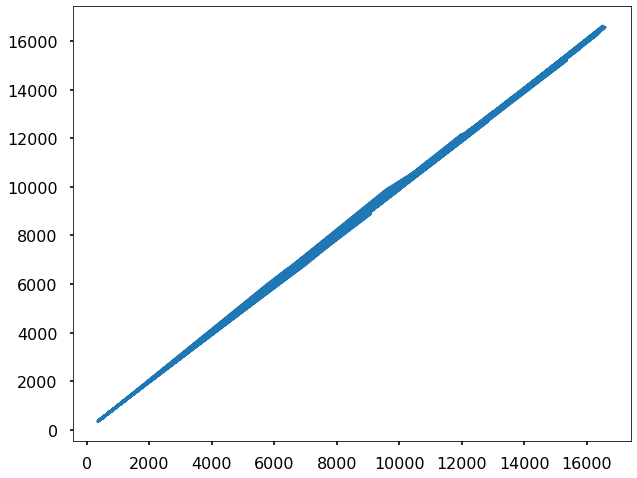

In [85]:
x = y_test
y = r_pred
plt.plot(x,y)
plt.show()

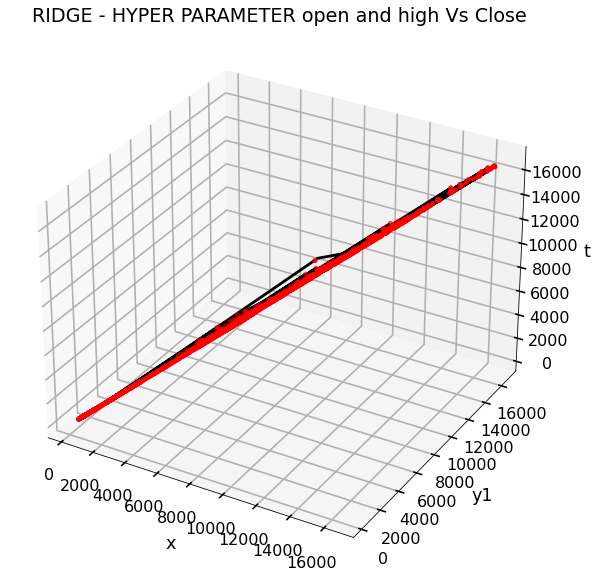

In [162]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

t = x_test[:,1] #open
x = x_test[:,2] #high
y = r_pred
y1 = y_test

ax.plot3D(x, y, t , color = "black")
ax.scatter3D(x, y1, t , color= "red")

ax.set_title('RIDGE - HYPER PARAMETER open and high Vs Close')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_ylabel('y1', labelpad=20)
ax.set_zlabel('t', labelpad=20)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

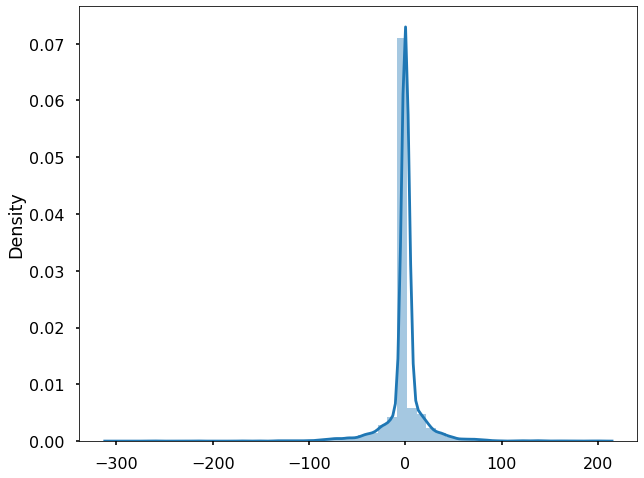

In [178]:
import seaborn as sns

sns.distplot(y_test-r_pred )

polymonial
